In [1]:
from datasets import xview
from PIL import Image, ImageDraw, ImageColor
from IPython.display import display
from pylab import rcParams
import pandas as pd
import numpy as np
from numpy import array, stack, hstack, vstack, zeros
from tqdm import tqdm
import seaborn as sns
from matplotlib import pyplot as plt
sns.set()

xview_root = '/data/guyga/datasets/xview/train_images'

# Utility functions
def draw_annot(img, bb, orig_dims, color, lbl_str=None):
    # Scale BB as needed according to ratio of orig_dims and current ones
    width, height = orig_dims
    w, h = img.size
    bb[0] *= w / width; bb[2] *= w / width
    bb[1] *= h / height; bb[3] *= h / height
    ImageDraw.Draw(img).rectangle(((bb[0], bb[1]), (bb[2], bb[3])), outline=color)
    if lbl_str:
        ImageDraw.Draw(img).text((bb[0], bb[1] - 10), lbl_str)

colors = list(ImageColor.colormap.values())

In [2]:
# Load xview development set
dev_dataset = xview.XView(xview_root)
print(len(dev_dataset), dev_dataset.num_classes())

  1%|▏         | 8416/601937 [00:00<00:07, 84151.25it/s]

   >> /data/guyga/datasets/xview/train_images


100%|██████████| 601937/601937 [00:07<00:00, 80446.38it/s]


846 16


### Display a demo image with its annotations

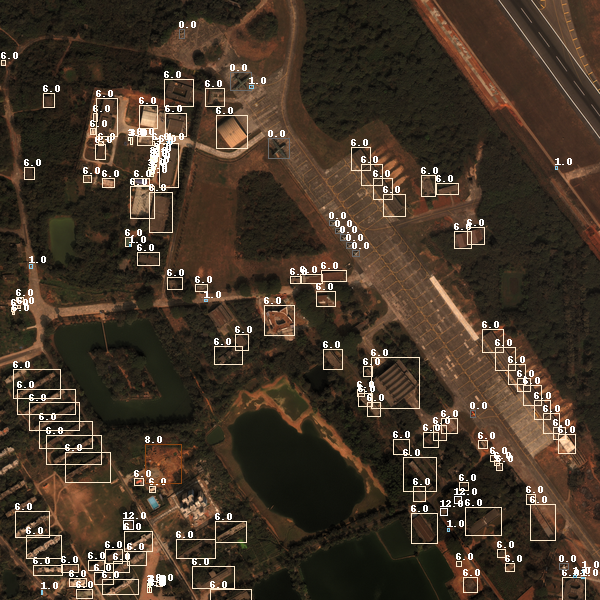

In [3]:
ii = 1  # item index in dataset
img0 = Image.fromarray((dev_dataset[ii]['img'] * 255).astype('uint8'))
img = img0.resize((600, 600), Image.ANTIALIAS)
for annot in dev_dataset[ii]['annot']:
    draw_annot(img, array(annot[:-1]), img0.size, color=colors[int(annot[-1])], lbl_str=str(annot[-1]))
img

### Visualize target classes (to inspect their coarsening)

In [4]:
# dev_dataset = xview.XView(xview_root)  # Coarse class
dev_dataset = xview.XView(xview_root, coarse_class=False)

  3%|▎         | 20000/601937 [00:00<00:05, 103254.15it/s]

   >> /data/guyga/datasets/xview/train_images


100%|██████████| 601937/601937 [00:07<00:00, 83547.97it/s] 


41.0 (15, 24)


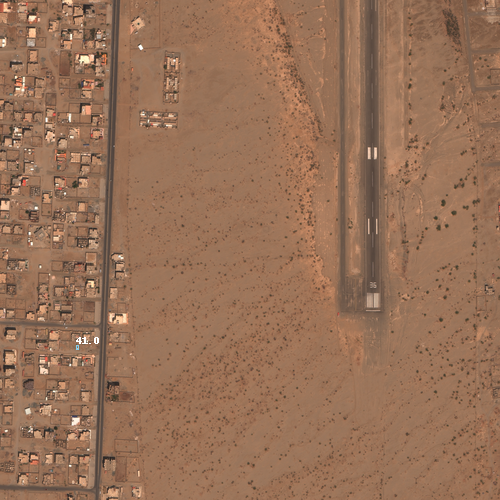

40.0 (98, 150)


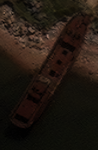

47.0 (89, 156)


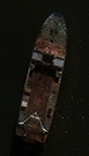

47.0 (130, 79)


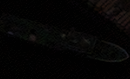

44.0 (152, 60)


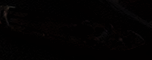

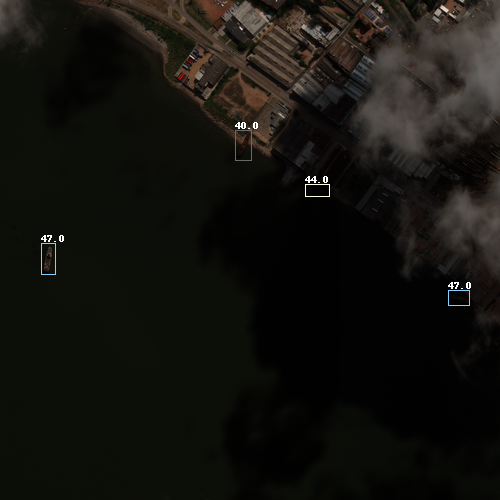

40.0 (493, 115)


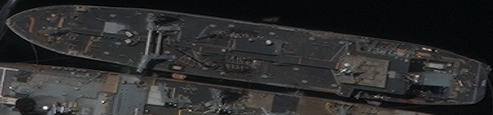

40.0 (628, 137)


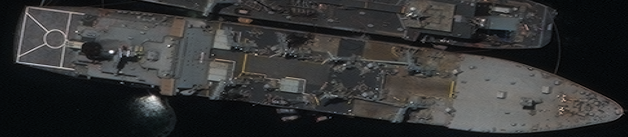

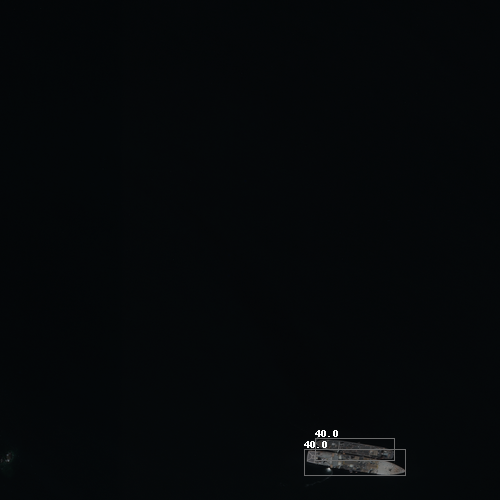

40.0 (29, 42)


40.0 (33, 44)


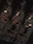

41.0 (36, 17)


40.0 (81, 104)


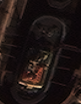

41.0 (58, 27)


40.0 (156, 56)


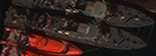

41.0 (26, 36)


47.0 (27, 45)


47.0 (30, 16)


44.0 (145, 62)


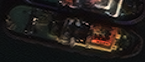

51.0 (662, 222)


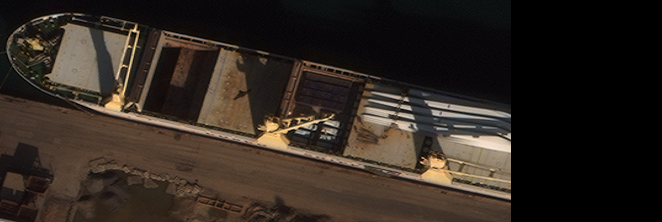

52.0 (228, 76)


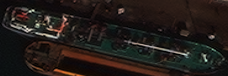

47.0 (63, 142)


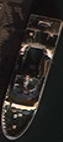

45.0 (177, 90)


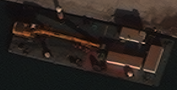

40.0 (162, 58)


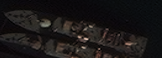

40.0 (63, 123)


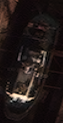

40.0 (86, 29)


40.0 (64, 143)


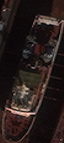

44.0 (96, 75)


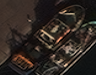

40.0 (57, 90)


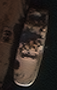

40.0 (59, 111)


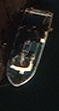

40.0 (149, 52)


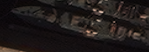

40.0 (168, 54)


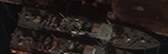

49.0 (113, 44)


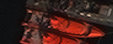

51.0 (440, 132)


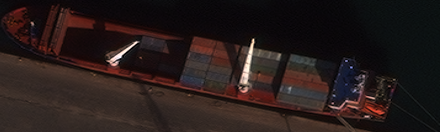

49.0 (172, 49)


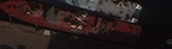

44.0 (57, 71)


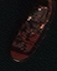

44.0 (142, 58)


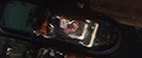

50.0 (128, 38)


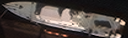

40.0 (129, 50)


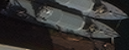

40.0 (140, 35)


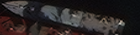

47.0 (55, 25)


40.0 (176, 67)


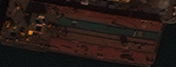

51.0 (752, 206)


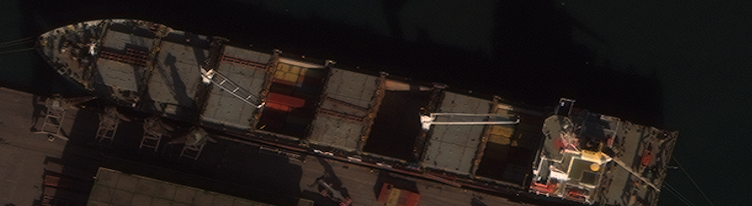

40.0 (56, 117)


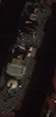

44.0 (78, 80)


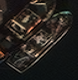

40.0 (139, 53)


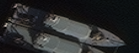

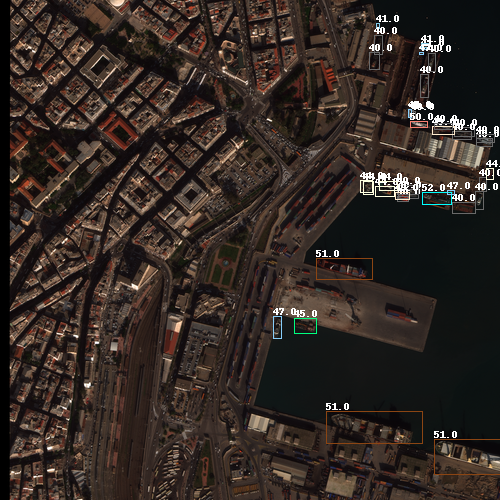

41.0 (24, 37)


41.0 (20, 36)


50.0 (25, 42)


50.0 (55, 16)


41.0 (24, 32)


41.0 (37, 18)


50.0 (58, 23)


41.0 (19, 31)


41.0 (49, 16)


50.0 (29, 57)


41.0 (23, 35)


50.0 (78, 25)


41.0 (31, 15)


41.0 (61, 27)


41.0 (18, 33)


41.0 (19, 27)


41.0 (29, 35)


50.0 (28, 58)


41.0 (15, 38)


50.0 (60, 28)


41.0 (38, 16)


41.0 (35, 16)


41.0 (44, 17)


41.0 (39, 20)


41.0 (35, 17)


41.0 (17, 17)


42.0 (25, 17)


42.0 (43, 24)


42.0 (43, 23)


42.0 (51, 25)


42.0 (42, 23)


42.0 (42, 27)


42.0 (53, 29)


41.0 (45, 23)


41.0 (47, 20)


41.0 (32, 15)


41.0 (50, 21)


50.0 (65, 30)


50.0 (67, 29)


42.0 (38, 16)


42.0 (35, 22)


42.0 (53, 25)


42.0 (42, 24)


42.0 (50, 18)


42.0 (51, 20)


42.0 (48, 17)


41.0 (59, 23)


41.0 (56, 18)


41.0 (56, 22)


41.0 (26, 21)


41.0 (46, 15)


41.0 (35, 15)


42.0 (43, 18)


41.0 (33, 14)


42.0 (53, 30)


42.0 (44, 19)


41.0 (20, 32)


41.0 (22, 33)


41.0 (25, 41)


41.0 (21, 29)


41.0 (26, 34)


42.0 (34, 42)


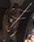

41.0 (16, 25)


41.0 (14, 23)


41.0 (13, 20)


41.0 (15, 25)


41.0 (15, 23)


41.0 (15, 27)


41.0 (14, 20)


41.0 (23, 37)


41.0 (15, 24)


41.0 (23, 23)


41.0 (15, 22)


41.0 (13, 18)


41.0 (13, 18)


50.0 (52, 19)


50.0 (90, 27)


50.0 (78, 28)


41.0 (22, 9)


41.0 (21, 12)


42.0 (18, 31)


41.0 (21, 20)


42.0 (20, 35)


50.0 (26, 45)


50.0 (23, 43)


41.0 (23, 39)


50.0 (33, 67)


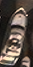

50.0 (31, 40)


42.0 (20, 25)


42.0 (26, 37)


50.0 (23, 44)


50.0 (29, 43)


42.0 (22, 36)


42.0 (20, 28)


41.0 (19, 27)


41.0 (16, 22)


41.0 (14, 20)


41.0 (12, 19)


41.0 (12, 20)


41.0 (14, 19)


50.0 (50, 96)


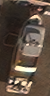

50.0 (51, 90)


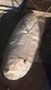

42.0 (31, 20)


42.0 (51, 31)


42.0 (46, 25)


42.0 (49, 25)


50.0 (27, 48)


42.0 (30, 46)


50.0 (24, 43)


50.0 (31, 53)


42.0 (65, 21)


50.0 (24, 49)


50.0 (60, 17)


41.0 (17, 28)


50.0 (68, 22)


50.0 (100, 41)


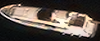

42.0 (24, 51)


50.0 (34, 63)


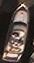

50.0 (79, 26)


50.0 (113, 34)


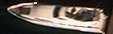

42.0 (51, 21)


42.0 (54, 23)


41.0 (47, 19)


42.0 (48, 30)


42.0 (43, 25)


41.0 (64, 23)


41.0 (43, 19)


41.0 (43, 19)


50.0 (68, 26)


50.0 (76, 37)


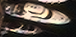

41.0 (50, 27)


50.0 (60, 25)


41.0 (35, 18)


41.0 (41, 22)


41.0 (54, 19)


50.0 (88, 23)


41.0 (46, 18)


50.0 (59, 24)


41.0 (55, 21)


41.0 (53, 28)


50.0 (52, 26)


50.0 (72, 25)


50.0 (50, 18)


50.0 (56, 17)


41.0 (44, 14)


41.0 (53, 23)


50.0 (71, 24)


41.0 (38, 12)


41.0 (33, 20)


50.0 (57, 20)


41.0 (41, 18)


50.0 (84, 27)


50.0 (72, 28)


41.0 (37, 19)


42.0 (64, 35)


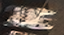

41.0 (44, 18)


41.0 (43, 21)


41.0 (37, 14)


50.0 (58, 21)


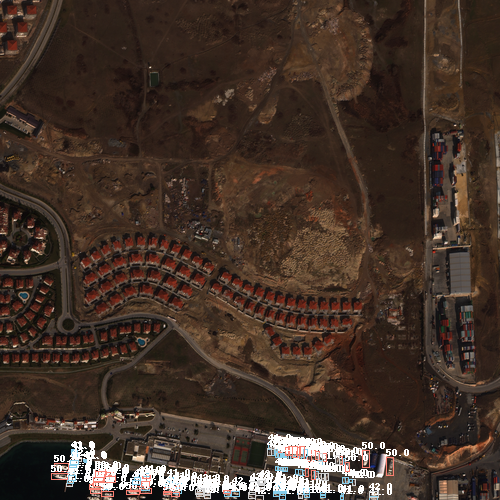

In [5]:
target_size = 500
# target_classes = xview.coarse_class_map[0]
# target_classes = [71, 72, 73, 74, 76, 77, 79, 83, 86, 89, 93, 94]
# target_classes = [20, 21, 23, 24, 25, 26, 27, 28, 29, 32, 60, 91]
# target_classes = [53, 54, 55, 56, 57, 59, 61, 62, 63, 64, 65, 66]
target_classes = [40, 41, 42, 44, 45, 47, 49, 50, 51, 52]  # Boat/Ship
# target_classes = [len(xview.coarse_class_map)-1]
max_cnt = 5  # number of considered images with relevant data
images = []
for x in dev_dataset:
    flag = False
    for annot in x['annot']:
        bb = array(annot[:-1])
        cls = annot[-1]
        if cls in target_classes:
            if not flag:
                img0 = Image.fromarray((x['img'] * 255).astype('uint8'))
                img = img0.resize((target_size, target_size), Image.ANTIALIAS)
                flag = True
            color_index = target_classes.index(cls)
            crop = img0.crop(bb)
            print(cls, crop.size)
            display(crop)
            draw_annot(img, bb, img0.size, color=colors[color_index], lbl_str=str(cls))
    if flag:
        images.append(img)
        display(img)
        if len(images) >= max_cnt:
            break      

### Visualize class weights (sample count of a class per dataset/per image)

In [6]:
dev_dataset = xview.XView(xview_root)  # Coarse class
class_names = list(xview.coarse_class_names)

dev = [unique(array(x)[:,-1], return_counts=True) for x in dev_dataset.annotations.values()]
# Make a matrix representing the class sample count per image
M = zeros((len(dev), dev_dataset.num_classes()))
for i, x in enumerate(dev):
    M[i, x[0]] = x[1]
class_cnt = M.sum(0)

  1%|▏         | 7680/601937 [00:00<00:07, 76796.41it/s]

   >> /data/guyga/datasets/xview/train_images


100%|██████████| 601937/601937 [00:07<00:00, 80348.42it/s]


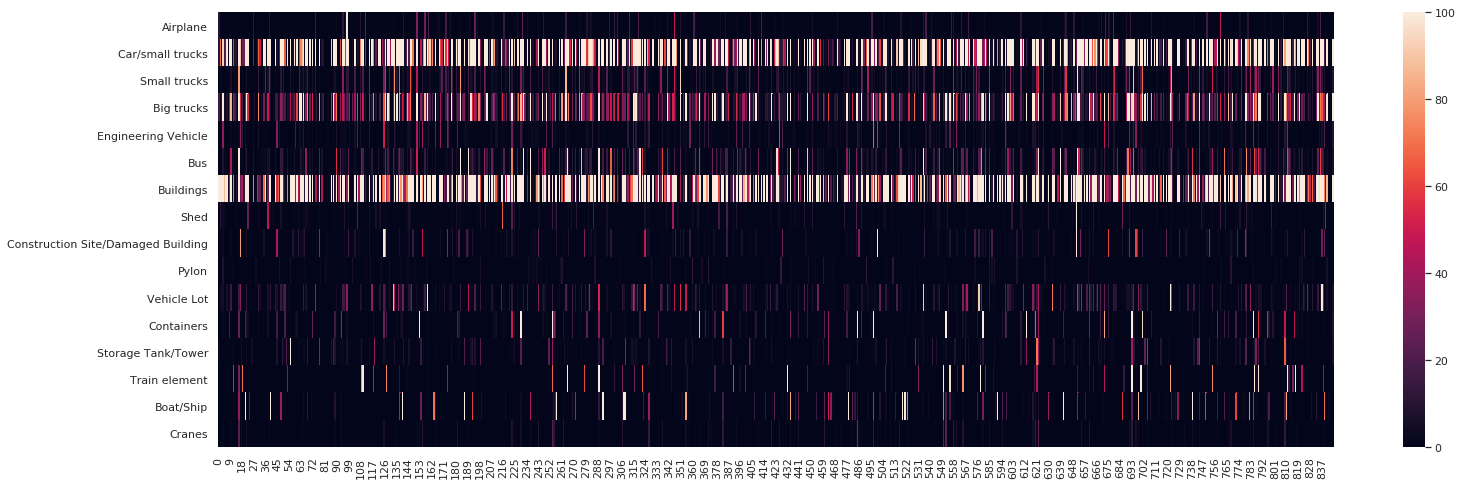

In [7]:
rcParams['figure.figsize'] = 5*5, 2*4
df = pd.DataFrame(M, columns=class_names)
sns.heatmap(df.T, vmax=100)
# plt.clim(0, 50)

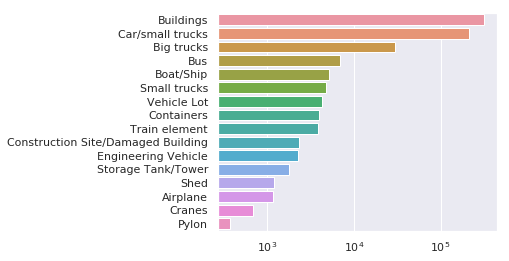

In [8]:
rcParams['figure.figsize'] = 5, 4
df0 = pd.DataFrame([dict(zip(class_names, class_cnt))])
g = sns.barplot(data=df0.T.sort_values(0, ascending=False).T, orient='h')
# g = sns.barplot(data=df0, orient='h')
# g.set(xlim=(0, 1000))
g.set_xscale("log")

### Split to balanced train/val. 

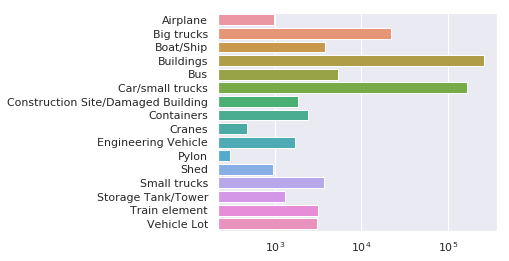

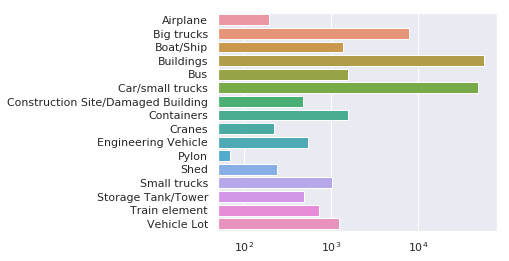

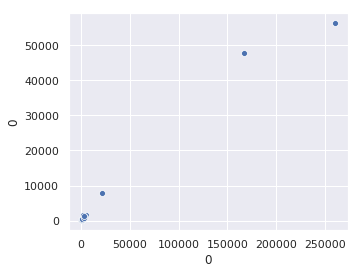

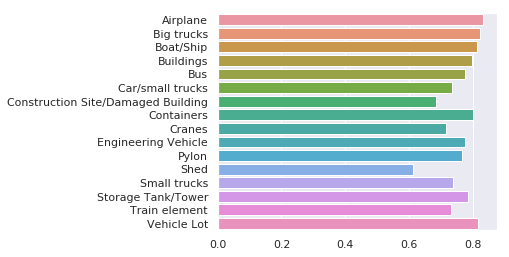

In [9]:
results = []
# class_names = list(xview.class_id_map.values())
class_names = list(xview.coarse_class_names)
train_size = .8  # 80/20 train/val
perm = np.random.permutation(len(dev))
train_indices = perm[:int(train_size*len(dev))]
val_indices = perm[int(train_size*len(dev)):]
train, val = array(dev)[train_indices], array(dev)[val_indices]
for dset_i, dset in enumerate([train, val]):
    M = zeros((len(dset), dev_dataset.num_classes()))
    for i, x in enumerate(dset):
        M[i, x[0]] = x[1]

    class_cnt = M.sum(0)
    df0 = pd.DataFrame([dict(zip(class_names, class_cnt))])
    g = sns.barplot(data=df0, orient='h')
    g.set_xscale("log")
    plt.show()
    results.append(df0.T[0])
sns.scatterplot(results[0], results[1])
plt.show()
sns.barplot(data=pd.DataFrame([dict(zip(class_names, results[0]/(results[0]+results[1])))]), orient='h')

### Optimize split balance

In [ ]:
class_names = list(xview.coarse_class_names)
train_size = .8
best_std = np.inf
for ii in range(100):
    results = []
    perm = np.random.permutation(len(dev))
    train_indices = perm[:int(train_size*len(dev))]
    val_indices = perm[int(train_size*len(dev)):]
    train, val = array(dev)[train_indices], array(dev)[val_indices]
    for dset_i, dset in enumerate([train, val]):
        M = zeros((len(dset), dev_dataset.num_classes()))
        for i, x in enumerate(dset):
            M[i, x[0]] = x[1]
        results.append(M.sum(0))
    cur_std = np.std(results[0]/(results[0]+results[1]))
    if cur_std < best_std:
        split_selected = train_indices, val_indices
        print(ii, best_std, '->', cur_std)
        best_std = cur_std 

0 inf -> 0.045763846725436305
1 0.045763846725436305 -> 0.045145948425139984
2 0.045145948425139984 -> 0.03500299390002456
18 0.03500299390002456 -> 0.03396445871428613
21 0.03396445871428613 -> 0.033442060633247346
43 0.033442060633247346 -> 0.0219251150436179


In [ ]:
# make symbolic links to train/val partition
for cat_str, cat_indices in [('train', train_indices), ('val': val_indices)]:
    for image_name in tqdm(array(list(train_dataset.annotations.keys()))[cat_indices]):
        os.symlink('/data/guyga/datasets/xview/train_images/' + image_name, '/data/guyga/datasets/xview/%s/%s' % (cat_str, image_name))